These are solutions to the following questions: https://hyperelliptic.org/tanja/teaching/crypto20/first-final.pdf

# Exercise 1

In [1]:
p = 1000003
Fp = GF(p)
Fp

Finite Field of size 1000003

In [2]:
# generator of the multiplicative group
g = Fp(2)

## Exercise 1a

In [3]:
# a should __not__ be a finite field element; we are just multiplying g with itself a times, not (a mod p) times
a = 322470
hA = g^a
hA

514229

## Exercise 1b

In [4]:
hB = Fp(55013)
hAB = hB^a
hAB

553408

<div class="alert alert-success">
    So, we have that the shared secret between Alice and Bob is $553408$.
</div>

To check our result, we compute $b$ and then compute the shared secret from that as well.

In [15]:
b = discrete_log(hB, g)
b

866205

In [12]:
hA^b

553408

<div class="alert alert-warning">
    Why does the following <strong>not</strong> give the same result?
</div>

In [16]:
g^(b*a), g^(a*b), g^(int(a)*int(b))

(553408, 553408, 553408)

<div class="alert alert-info">
    Probably because $a$ is still an integer in the ring of integers $\mod p$. This gives that $a\cdot b$ is different.
    <br><br>
    By computing the following (where we manually specify $a$ as an integer), we do obtain the same result.
</div>

In [8]:
g^(322470*866205)

553408

<div class="alert alert-warning">
    Now, the question is: which method gives the correct result?
</div>

# Exercise 2

In [9]:
p = 29009
Fp = GF(29009)
Fp

Finite Field of size 29009

In [10]:
# Let's check whether the given statement holds:
g = Fp(11)
g.multiplicative_order() == p-1

True

In [11]:
# To check our results later on, we first compute the discrete logarithm using SageMath.
solution = discrete_log(Fp(12542), Fp(11))
solution

3364

## Exercise 2a

By the Chinese remainder theorem, if we have a list of congruences of the following form:
$$\begin{align}
a & \equiv & r_1 \mod n_1 \\
a & \equiv & r_2 \mod n_2 \\
a & \equiv & r_3 \mod n_3
\end{align}$$
where $n_1$, $n_2$ and $n_3$ are coprime, then there exists a solution for $a \mod n_1\cdot n_2\cdot n_3$. Furthermore, this solution is efficiently computable.

In the Pohlig-Hellman attack, we have that we want to compute
$b \mod p-1$, where $p-1$ has a known factorization in primes raised to some power (all of which are coprime to each other). In this case, we have that $p-1=2^4\cdot 7^2\cdot 37$.

Hence, if we can compute the values of $r_1$, $r_2$ and $r_3$ in the congruences
$$\begin{align}
a & \equiv & r_1 \mod 2^4 \\
a & \equiv & r_2 \mod 7^2 \\
a & \equiv & r_3 \mod 37
\end{align}$$
then we can easily compute the value of $a\mod 2^4\cdot 7^2\cdot 37$ afterwards. Since solving discrete logarithms is much easier in smaller groups (i.e. it becomes much more feasible using brute-force, BSGS or Pollard's rho method), this speeds up the computation of the discrete logarithm significantly. The Pohlig-Hellman attack which is described below does exactly this.

## Exercise 2b

<!-- 1. for $i = 1$ to $r$
    
    1.1 put $Q_i = Q$, $a_{i,−1} = 0$, $n_i =n/p_i$

    1.2 compute $R_i = n_i P$
    
    1.3 for $j = 0$ to $e_i − 1$

      1.3.1 compute $n_i = n/p_i^{j+1}$ # divide old $n_i$ by $p_i$ unless $j = 0$
        
      1.3.2 compute $Q_i = Q_i − (a_{i,j−1}p_i^{j−1})P$

      1.3.3 compute $S_i = n_i Q_i$
        
      1.3.4 solve DLP $S_i = a_{i,j} R_i$ of order $p_i$

    1.4 compute $a_i \equiv \sum\limits_{j=0}^{e_j−1}a_{i,j}p_i^j$ -->
    
For the Pohlig-Hellman attack on Elliptic curves, we have the following algorithm:
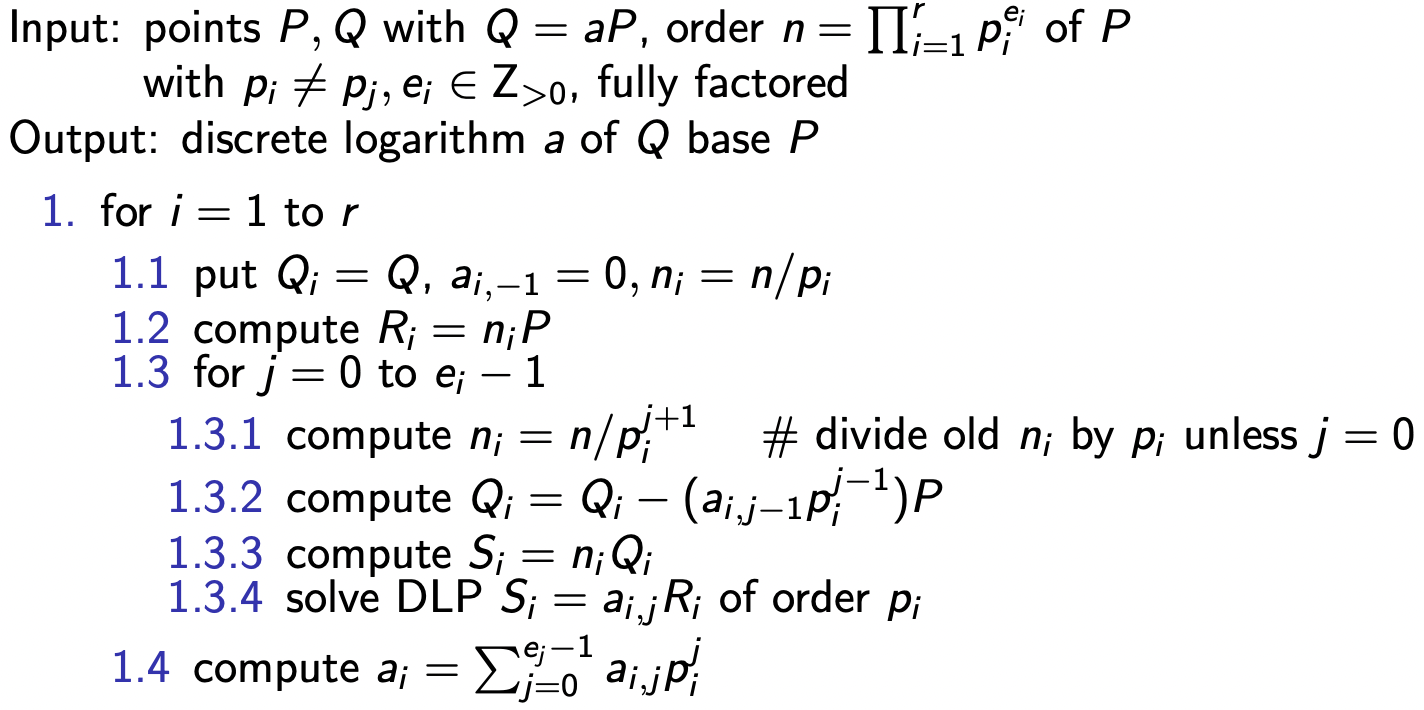

However, in this exercise, we are dealing with finite fields. In that case, a proper description of the algorithm is given at https://hyperelliptic.org/tanja/teaching/crypto20/pohlig-hellman.pdf.

First, we compute $b\mod 2^4$. To do so, we use the algorithm presented in slide 9 of the slide set with a Pohlig-Hellman example.

<div class="alert alert-info">
    First, we define a few more parameters.
</div>

In [12]:
# The n defined in the algorithm is equal to our p-1
n = p-1
n

29008

In [13]:
# The value for which we need to compute the discrete logarithm.
h = Fp(12542)
h

12542

<div class="alert alert-info">
    Now, we start the actual computation.
</div>

In [14]:
h_prime = h

In [15]:
a_ijminus1 = 0

### `for`-loop, iteration 0

In [16]:
j = 0

In [17]:
h_prime = h_prime/(g^(a_ijminus1*2^(j-1)))
h_prime

12542

In [18]:
g^(n/2)

29008

In [19]:
h_prime^(n/2^(j+1))

1

We are computing $b_{2,0}=\log_{g^{n/2}}(h')^{n/2^1}$. 
Thus, $\left(g^{n/2}\right)^{b_{2,0}} = (h')^{n/2^1}$, or, filling in the numbers, we get
$$29008^{b_{2,0}}=1$$
This holds if $b_{2,0}=0$.

In [20]:
# To check our results, we perform the following computation
a_ijminus1 = discrete_log(h_prime^(n/2^(j+1)), g^(n/2))
a_ijminus1

0

In [21]:
# As a sanity check, let us compute the correct result from the already-computed discrete logarithm.
Mod(solution, 2^1)

0

### `for`-loop, iteration 1

In [22]:
j = 1

In [23]:
h_prime = h_prime/(g^(a_ijminus1*2^(j-1)))

In [24]:
g^(n/2), h_prime^(n/2^(j+1))

(29008, 1)

We want to solve the equation $\left(g^{n/2}\right)^{b_{2,1}} = (h')^{n/2^2}$. Filling in the numbers computed above, we get
$$29008^{b_{2,1}}=1$$
This holds if $b_{2,1}=0$.

In [25]:
# Additionally, we compute the same result using the discrete_log function
a_ijminus1 = discrete_log(h_prime^(n/2^(j+1)), g^(n/2))
a_ijminus1

0

### `for`-loop, iteration 2

In [26]:
j = 2

In [27]:
h_prime = h_prime/(g^(a_ijminus1*2^(j-1)))

In [28]:
g^(n/2), h_prime^(n/2^(j+1))

(29008, 29008)

We want to solve the equation $\left(g^{n/2}\right)^{b_{2,2}} = (h')^{n/2^3}$. Filling in the numbers computed above, we get
$$29008^{b_{2,2}}=29008$$
This holds if $b_{2,2}=1$.

In [29]:
# Additionally, we compute the same result using the discrete_log function
a_ijminus1 = discrete_log(h_prime^(n/2^(j+1)), g^(n/2))
a_ijminus1

1

### `for`-loop, iteration 3

In [30]:
j = 3

In [31]:
h_prime = h_prime/(g^(a_ijminus1*2^(j-1)))

In [32]:
g^(n/2), h_prime^(n/2^(j+1))

(29008, 1)

We want to solve the equation $\left(g^{n/2}\right)^{b_{2,3}} = (h')^{n/2^4}$. Filling in the numbers computed above, we get
$$29008^{b_{2,3}}=1$$
This holds if $b_{2,3}=0$.

In [33]:
# Additionally, we compute the same result using the discrete_log function
a_ijminus1 = discrete_log(h_prime^(n/2^(j+1)), g^(n/2))
a_ijminus1

0

### Checking the final result

In [34]:
# Our intermediate results were
b2_0 = 0
b2_1 = 0
b2_2 = 1
b2_3 = 0

# Our final result is
b_2 = b2_0 + b2_1*2 + b2_2*2^2 + b2_3*2^3
b_2

4

In [35]:
# As a sanity check, let us compute the correct result from the already-computed discrete logarithm.
Mod(solution, 2^4)

4

In [36]:
# To verify our result, we compute g^(n/2^4)^(b_2), and check whether this is equal to h^(n/2^4).
(g^(n/2^4))^b_2, h^(n/2^4), (g^(n/2^4))^b_2 == h^(n/2^4)

(26316, 26316, True)

<div class="alert alert-success">
    Hence, we get that $b\equiv 4\mod 2^4$.
</div>

## Exercise 2c

In [37]:
h_prime = h
a_ijminus1 = 0

In [38]:
# First iteration of the for-loop
j = 0
h_prime = h_prime/(g^(a_ijminus1*7^(j-1)))

g^(n/7), h_prime^(n/7^(j+1))

(25100, 13173)

So, the image of the base $g$ in the subgroup of order $7$ is $25100$, while the image of the target $h$ in the subgroup of order $7$ is $12542$.

We are computing $b_{7,0}=\log_{g^{n/7}}(h')^{n/7^1}$. 
Thus, $\left(g^{n/7}\right)^{b_{7,0}} = (h')^{n/7^1}$, or, filling in the numbers, we get
$$25100^{b_{7,0}}=13173$$

Next, we compute $25100^k$, for $k\in\{0,1,2,3,4,5,6\}$.

In [39]:
for k in range(0,7):
    print("25100^" + str(k) + " = " + str((g^(n/7))^k))

25100^0 = 1
25100^1 = 25100
25100^2 = 21547
25100^3 = 14913
25100^4 = 13173
25100^5 = 26727
25100^6 = 14575


Hence, we get that the equation holds if $b_{7,0}=4$.

In [40]:
# To check our results, we perform the following computation
a_ijminus1 = discrete_log(h_prime^(n/7^(j+1)), g^(n/7))
a_ijminus1

4

Next, we repeat the steps, but update $h'$ first. We get that the image in the subgroup of order $7^2$ is given by

In [41]:
# First iteration of the for-loop
j = 1
h_prime = h_prime/(g^(a_ijminus1*7^(j-1)))

g^(n/7), h_prime^(n/7^(j+1))

(25100, 13173)

We actaually already know the answer, since we (coincidentally) end up with the same equation as before. Still, for consistency, we copy what we already had above:

We are computing $b_{7,1}=\log_{g^{n/7}}(h')^{n/7^2}$. 
Thus, $\left(g^{n/7}\right)^{b_{7,1}} = (h')^{n/7^2}$, or, filling in the numbers, we get
$$25100^{b_{7,1}}=13173$$

Next, we compute $25100^k$, for $k\in\{0,1,2,3,4,5,6\}$.

In [42]:
for k in range(0,7):
    print("25100^" + str(k) + " = " + str((g^(n/7))^k))

25100^0 = 1
25100^1 = 25100
25100^2 = 21547
25100^3 = 14913
25100^4 = 13173
25100^5 = 26727
25100^6 = 14575


Hence, we get that the equation holds if $b_{7,1}=4$.

Finally, we compute $b_7 = b_{7,0} + b_{7,1}\cdot 7$:

In [43]:
# Our intermediate results were
b7_0 = 4
b7_1 = 4

# Our final result is
b_7 = b7_0 + b7_1*7
b_7

32

Next, we verify our results. As before, we do this in two different ways:
1. By computing $b\mod 7^2$ from the discrete logarithm solution obtained by SageMath.
2. By computing whether $g^{{\left(\frac{n}{7^2}\right)}^{\left(b\mod 7\right)}} = h^{\frac{n}{7^2}}$

In [44]:
# As a sanity check, let us compute the correct result from the already-computed discrete logarithm.
Mod(solution, 7^2)

32

In [45]:
# To verify our result, we compute g^(n/7^2)^(b_7), and check whether this is equal to h^(n/7^2).
(g^(n/7^2))^b_7, h^(n/7^2), (g^(n/7^2))^b_7 == h^(n/7^2)

(8058, 8058, True)

## Exercise 2d

First, we define our target (in the usual way):

In [46]:
a_ijminus1 = 0

j = 0
h_prime = h/(g^(a_ijminus1*37^(j-1)))

G = g^(n/37)
H = h_prime^(n/37^(j+1))

G, H

(3243, 17462)

As instructed, we then compute the precomputed steps $s_1$, $s_2$, $s_3$, $s_4$ and $s_5$.

In [47]:
# First, we compute the 5 precomputed steps
r = [3, 25, 12, 4, 9]
t = [17, 13, 25, 10, 32]
s_i = [G^r[i] * H^t[i] for i in range(0,5)]

s_i

[15419, 14049, 22411, 22411, 16777]

In [48]:
# Initialize an array to store the walk
w = [None for i in range(0, 10)]

# Define the starting point as w[0]
s = 31
w[0] = G^s


# We also define some arrays to store the coefficients we use.
b = [None for i in range(len(w))]
c = [None for i in range(len(w))]
b[0] = s
c[0] = 0

In [49]:
for i in range(1, len(w)):
    # Compute the current element modulo 5
    current_element_mod_5 = Mod(w[i-1], 5)
    
    # Determine the step to be selected
    selected_step = s_i[current_element_mod_5]
    
    # Compute the next step in the walk
    w[i] = w[i-1] * selected_step
    
    # Compute the coefficients as well
    b[i] = b[i-1] + r[current_element_mod_5]
    c[i] = c[i-1] + t[current_element_mod_5]
    
# Show the obtained steps in the walk
w

[7845, 23534, 17428, 1732, 1810, 1732, 1810, 1732, 1810, 1732]

In [50]:
slow_walk = [w[i] for i in range(len(w))]
fast_walk = [w[2*i] for i in range(floor(len(w)/2))]

In [51]:
slow_walk[0:len(fast_walk)], fast_walk

([7845, 23534, 17428, 1732, 1810], [7845, 17428, 1810, 1810, 1810])

In [52]:
for i in range(1, len(fast_walk)):
    if slow_walk[i] == fast_walk[i]:
        collision_index = i
        break
collision_index

4

<div class="alert alert-success">
    This matches our expectations, since we were told that the collision should occur after 4 steps.
</div>

## Exercise 2e

Next, we compute $b\mod 37$ from the exponents of the fast and slow walk.

In [53]:
# In the next line, pay attention! The coefficients need to be in different place compared to the first line.
a = Mod((b[collision_index]-b[2*collision_index])/(c[2*collision_index]-c[collision_index]), 37)
a

34

In [54]:
# As a sanity check, let us compute the correct result from the already-computed discrete logarithm.
Mod(solution, 37)

34

In [55]:
# To verify our result, we compute g^(n/37)^(b_37), and check whether this is equal to h^(n/37).
(g^(n/37))^a, h^(n/37), (g^(n/37))^a == h^(n/37)

(17462, 17462, True)

## Exercise 2f

Finally, we need to compute the results to obtain $b$. This is easy and straightforward to do using the `CRT` function in SageMath, but it should be done carefully to avoid mixing up the parameters.

In [56]:
# First, we look up the documentation
?CRT

Signature:      CRT(a, b, m=None, n=None)
Docstring:     
   Return a solution to a Chinese Remainder Theorem problem.

   INPUT:

   * "a", "b" - two residues (elements of some ring for which extended
     gcd is available), or two lists, one of residues and one of
     moduli.

   * "m", "n" - (default: "None") two moduli, or "None".

   OUTPUT:

   If "m", "n" are not "None", returns a solution x to the
   simultaneous congruences x\equiv a \bmod m and x\equiv b \bmod n,
   if one exists. By the Chinese Remainder Theorem, a solution to the
   simultaneous congruences exists if and only if a\equiv
   b\pmod{\gcd(m,n)}. The solution x is only well-defined modulo
   lcm(m,n).

   If "a" and "b" are lists, returns a simultaneous solution to the
   congruences x\equiv a_i\pmod{b_i}, if one exists.

   See also:

     * "CRT_list()"

   EXAMPLES:

   Using "crt" by giving it pairs of residues and moduli:

      sage: crt(2, 1, 3, 5)
      11
      sage: crt(13, 20, 100, 301)
      28013
 

In [57]:
found_solution = CRT([4, 32, 34], [2^4, 7^2, 37])
found_solution

3364

In [58]:
# Finally, we verify our found solution.
# This can easily be done by computing g^b (where b is the found solution) and verifying whether it is equal to h.
g^found_solution == h

True

<div class="alert alert-success">
    Hence, we have that the solution to the discrete logarithm is indeed correct, and has the value $3364$.
</div>

# Exercise 3

In [59]:
n = 14802907667
a = 934311

## Exercise 3a

In [60]:
s = lcm(range(1, 16+1)) # when doing it like this, be very careful about Python's range function!
s

720720

In [61]:
# To verify our result, we compute the factorization of s
s.factor()

2^4 * 3^2 * 5 * 7 * 11 * 13

## Exercise 3b

In [62]:
b = Mod(a^s, n)
b

3886901517

## Exercise 3c

In [63]:
p = int(gcd(b-1, n))
p

1247401

## Exercise 3d

First, let us compute the other factor of $n$. We have that $q=\frac{n}{p}$:

In [64]:
q = n / p
q

11867

In [65]:
# Let's verify our results
p * q == n

True

From this point on, we factor $p-1$, $q-1$, $s$ and the order of $a$ in both of the multiplicative groups of integers $\mod p$ and $\mod q$. After that, we can reason using the information in my solutions to the sixth homework set.

In [66]:
(p-1).factor()

2^3 * 3^4 * 5^2 * 7 * 11

After dividing by the factors which $p-1$ and $s$ have in common, we obtain `3^2 * 5`.

In [71]:
(q-1).factor()

2 * 17 * 349

After dividing by the factors which $q-1$ and $s$ have in common, we obtain `17 * 349`.

In [68]:
s.factor()

2^4 * 3^2 * 5 * 7 * 11 * 13

After dividing by the factors which $p-1$ and $s$ have in common, we obtain `2 * 13`.

After dividing by the factors which $q-1$ and $s$ have in common, we obtain `2^3 * 3^2 * 5 * 7 * 11`.

In [69]:
GF(p)(a).multiplicative_order().factor()

2^3 * 3^2 * 5 * 7 * 11

After dividing by the factors which $p-1$ and $s$ have in common, we obtain `1` (i.e. no factors are left over).

In [70]:
GF(q)(a).multiplicative_order().factor()

17 * 349

After dividing by the factors which $q-1$ and $s$ have in common, we obtain `17 * 349`.

<div class="alert alert-success">
    From all of this, we can conclude that the order of $a$ in $\mathbb{F}_p^*$ does not contain the factors which $p-1$ has, but $s$ does not have (after dividing $s$, $p-1$ and the order of $a$ by the factors which $p-1$ and $s$ have in common). Also, we can conclude that the order of $a$ in $\mathbb{F}_q^*$ does contain at least one of the factors which $q-1$ has, but $s$ does not have (after dividing $s$, $q-1$ and the order of $a$ by the factors which $q-1$ and $s$ have in common).
    <br><br>
    Hence, we can conclude that the $p-1$ method indeed works for this case.
</div>

# Exercise 4